Uniform function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_samples = 1200

low = -1
high = 0

In [3]:
s = np.random.uniform(low, high, number_of_samples)

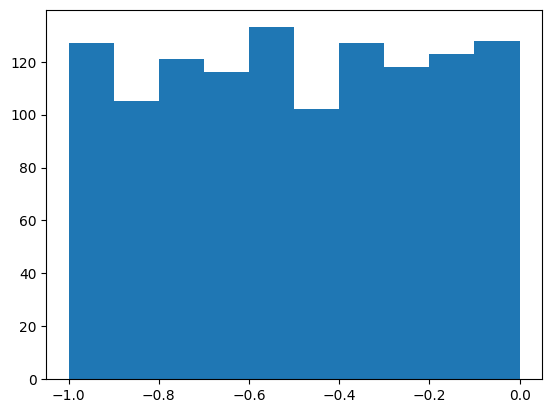

In [4]:
plt.hist(s)
plt.show()

______________________________________________________________________________________________________
Binomial

In [5]:
n = 100
p = 0.5
size = 1200

In [6]:
s = np.random.binomial(n, p, size)

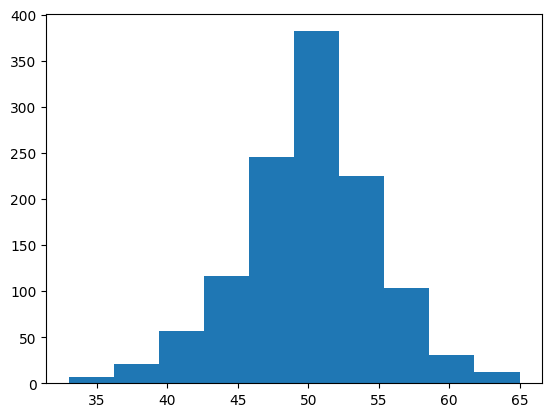

In [7]:
plt.hist(s)
plt.show()

________________________________________________
Truncnorm

In [8]:
from scipy.stats import truncnorm

In [9]:
def truncate_normal(mean = 0, sd = 1, low = 0, upp = 10):
    return truncnorm((low-mean)/ sd,
                     (upp-mean)/ sd,
                     loc = mean,
                     scale = sd)

In [10]:
X = truncate_normal(
    mean = 0,
    sd = 0.4,
    low = -0.5,
    upp = 0.5
)

s = X.rvs(10000)

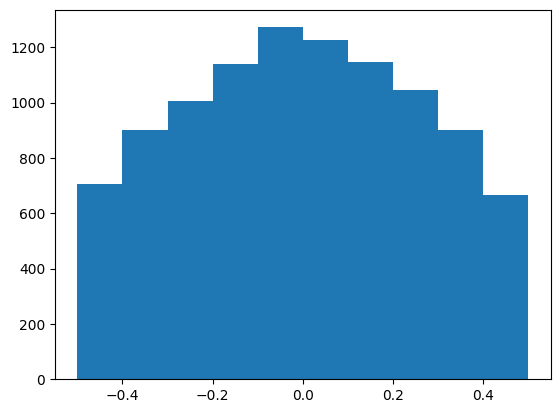

In [11]:
plt.hist(s)
plt.show()

_______________________
Confusion Matrix

In [18]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
image_size = 28
no_different_labels = 10
image_pixels = image_size * image_size

In [20]:
train_df = pd.read_csv("data/mnist_train.csv")
test_df = pd.read_csv("data/mnist_test.csv")

In [21]:
fac = 0.99/255

train_imgs = np.asarray(train_df.iloc[:, 1:], dtype=float) * fac + 0.01
test_imgs  = np.asarray(test_df.iloc[:, 1:], dtype=float)  * fac + 0.01

train_labels = np.asarray(train_df.iloc[:, 0], dtype=int)
test_labels  = np.asarray(test_df.iloc[:, 0], dtype=int)

In [22]:
lr = np.arange(10)

for label in range(10):
    one_hot = (lr == label).astype(int)
    print("label=", label, " in one-hot representation: ", one_hot)

label= 0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label= 1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label= 2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label= 3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label= 4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label= 5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label= 6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label= 7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label= 8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label= 9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [23]:
lr = np.arange(no_different_labels)

train_labels_one_hot = (lr == train_labels[:, None]).astype(float)
test_labels_one_hot  = (lr == test_labels[:, None]).astype(float)

In [24]:
train_labels_one_hot[train_labels_one_hot == 0] = 0.1
test_labels_one_hot[test_labels_one_hot == 0]   = 0.1

In [25]:
train_labels_one_hot[train_labels_one_hot == 1] = 0.99
test_labels_one_hot[test_labels_one_hot == 1] = 0.99

In [27]:
import pickle
import os

In [28]:
os.makedirs("data", exist_ok=True)
path = "data/mnist_data.pkl"

with open(path, "wb") as fh:
    data = (
        train_imgs,
        test_imgs,
        train_labels,
        test_labels_one_hot,
        train_labels_one_hot
    )
    pickle.dump(data, fh)

print("Pickle saved at:", path)

Pickle saved at: data/mnist_data.pkl


In [29]:
with open(path, "rb") as fh:
    data = pickle.load(fh)
    train_imgs = data[0]
    test_imgs = data[1]
    train_labels = data[2]
    test_labels_one_hot = data[3]
    train_labels_one_hot = data[4]

image_size = 28
no_of_different_labels = 10
image_pixels = image_size * image_size

In [30]:
print("train_imgs shape:", train_imgs.shape)
print("test_imgs shape:", test_imgs.shape)
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)
print("test_labels_one_hot shape:", test_labels_one_hot.shape)

train_imgs shape: (60000, 784)
test_imgs shape: (10000, 784)
train_labels shape: (60000,)
test_labels shape: (10000,)
train_labels_one_hot shape: (60000, 10)
test_labels_one_hot shape: (10000, 10)


In [31]:
@np.vectorize

def sigmoid(x):
    return 1/ (1+ np.e** -x)

activation_function = sigmoid

def truncated_normal(mean = 0, sd = 1, low = 0, upp = 10):
    return truncnorm((low-mean)/sd, (upp-mean)/sd, loc = mean, scale = sd)

In [ ]:
class NeuralNetwork:
    
    def __init__(self,
                no_in_nodes,
                no_out_nodes,
                no_hidden_nodes,
                learning_rate):
        self.no_in_nodes = no_in_nodes
        self.no_out_nodes = no_out_nodes
        self.no_hidden_nodes = no_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        rad = 1/ np.sqrt(self.no_in_nodes)
        X  = truncated_normal(mean = 0, sd = 1, low = -rad, upp = rad)
        
        self.wih = X.rvs((self.no_hidden_nodes, self.no_in_nodes))
        
        rad = 1/ np.sqrt(self.no_hidden_nodes)
        X  = truncated_normal(mean = 0, sd = 1, low = -rad, upp = rad)
    
        self.who = X.rvs((self.no_out_nodes, self.no_hidden_nodes))

    def train(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin =2).T
        target_vector = np.array(target_vector, ndmin =2).T
        
        output_vector1 = np.dot(self.wih, input_vector)
    
        output_hidden = activation_function(output_vector1)
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
        output_error = target_vector - output_network
        
        #update the weights:
        tmp = output_error * output_network * (1.0 - output_network)
        tmp = self.learning_rate * np.dot(tmp, output_hidden.T)
        self.who += tmp
    
        #calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_error)
    
        #update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        self.wih += self.learning_rate * np.dot(tmp, input_vector.T)

    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin = 2).T
        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        output_vector = np.dot(self.who, output_vector)
        oytput_vector = activation_function(output_vector)
    
        return output_vector

    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = int(labels[i])
            cm[res_max, int(target)] += 1
    
        return cm

    def precision(self, label, confusion_matrix):
        row = confusion_matrix[:, label]
        return confusion_matrix[label, label] / row.sum()

    def recall(self, label, confusion_matrix):
        column = confusion_matrix[label, :]
        return confusion_matrix[label, label] / column.sum()

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [49]:
ANN = NeuralNetwork(no_in_nodes = image_pixels,
                   no_out_nodes = 10,
                   no_hidden_nodes = 100,
                   learning_rate = 0.1)
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))

7 7 3.6081320890218955
2 2 1.9042083092596467
1 1 3.701844502151845
0 0 2.6323176555687096
4 4 2.8555881600946424
1 1 3.7603987982006153
4 4 3.307033446492227
9 9 2.860173287825371
5 9 0.5087037359542139
9 9 2.733319840254553
0 0 2.584406016773183
6 6 1.2621290222151136
9 9 2.738486068350789
0 0 2.8551468723708493
1 1 3.334176756679283
5 5 1.2688201900018723
9 9 2.5863721987945003
7 7 3.565358918878119
3 3 1.6036894226748792
4 4 2.924580621526061


In [50]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accuracy of  train:", corrects/(corrects + wrongs))

corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accuracy of  test:", corrects/(corrects + wrongs))

cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)

for i in range(10):
    print("digit", i, "percision:", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))

accuracy of  train: 0.93355
accuracy of  test: 0.9309
[[5658    0   23    6    7   28   27    8   15   21]
 [   0 6615   77   18   30   31   21   59   79   23]
 [   9   32 5331   60   15   14   11   47   14    9]
 [   5   22  117 5755    0  153    3   22   91   74]
 [  14   10   62    7 5244   34    7   50   16   55]
 [  18    1    4   22    0 4876   62    2   27    7]
 [  56    6   80   20   58   96 5726    7   38    4]
 [   2    6   48   33    4    6    0 5737    3   33]
 [ 150   41  181  134   22   97   57   41 5406   58]
 [  11    9   35   76  462   86    4  292  162 5665]]


NameError: name 'confusion_matrix' is not defined